In [1]:
import os
from fastai.vision.all import *
import pandas as pd

In [2]:
directory = 'data/images/'
df = pd.read_csv(f'{directory}train.csv')

file_paths = df['file_name'].values

In [3]:
train_path = '/home/liam/Documents/projects/bees/see-bees/data/images/'

tfms = [Normalize.from_stats([13.42158859], [4.495742013]),
        *aug_transforms(do_flip=True, size=128)]

dblock = DataBlock(
    blocks=(ImageBlock(cls=PILImage), CategoryBlock),
    getters=[ColReader('file_name', pref=train_path),
             ColReader('numbees')],
    splitter=TrainTestSplitter(),
    batch_tfms=tfms
)

dls = dblock.dataloaders(df, bs=2)
dls.n_imp = 1

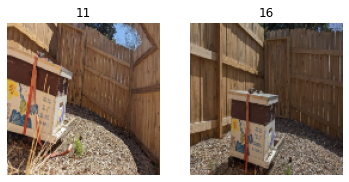

In [4]:
dls.show_batch()

# Train Model

In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fit(50)

epoch,train_loss,valid_loss,error_rate,time
0,4.492401,3.821326,0.949495,00:13
1,4.074395,3.699062,0.979798,00:13
2,3.834924,3.626685,0.969697,00:13
3,3.493370,3.465600,0.888889,00:13
4,3.709317,3.279940,0.878788,00:13
5,3.596597,3.324315,0.919192,00:13
6,3.775189,3.162657,0.939394,00:13
7,3.506971,2.995880,0.828283,00:13
8,3.420699,2.938451,0.898990,00:13
9,3.566872,2.972548,0.888889,00:13


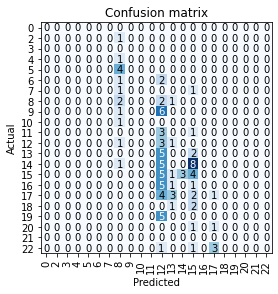

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
# model.